In [1]:
# Step 1: Import Libraries
# =============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [2]:
# Step 2: Load Dataset
# =============================
df = pd.read_csv("web_navigation.csv")
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

✅ Dataset loaded successfully!
Shape: (50, 2)
   SessionID                               Pages
0          1         Home,Products,Cart,Checkout
1          2                  Home,Products,Cart
2          3                  Home,About,Contact
3          4  Home,Products,Offers,Cart,Checkout
4          5           Home,Offers,Products,Cart


In [3]:
# Step 3: Transaction Encoding
# =============================
transactions = df['Pages'].apply(lambda x: x.split(',')).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
print("\n✅ Encoded Transactions:")
print(df_encoded.head())



✅ Encoded Transactions:
   About   Cart  Checkout  Contact  Home  Offers  Products
0  False   True      True    False  True   False      True
1  False   True     False    False  True   False      True
2   True  False     False     True  True   False     False
3  False   True      True    False  True    True      True
4  False   True     False    False  True    True      True


In [4]:
# Step 4: Apply Apriori Algorithm
# =============================
frequent_items = apriori(df_encoded, min_support=0.1, use_colnames=True)
frequent_items = frequent_items.sort_values(by="support", ascending=False)
print("\n✅ Frequent Itemsets Found:", len(frequent_items))
print(frequent_items.head(10))


✅ Frequent Itemsets Found: 25
    support                itemsets
3      1.00                  (Home)
5      0.90              (Products)
14     0.90        (Home, Products)
1      0.70                  (Cart)
8      0.70            (Home, Cart)
10     0.68        (Cart, Products)
19     0.68  (Home, Cart, Products)
13     0.34          (Home, Offers)
4      0.34                (Offers)
15     0.30      (Products, Offers)


In [5]:
# Step 5: Generate Association Rules
# =============================
if not frequent_items.empty:
    rules = association_rules(frequent_items, metric="confidence", min_threshold=0.3)
    rules = rules.sort_values(by="lift", ascending=False)
    print("\n✅ Association Rules Generated:", len(rules))
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
else:
    print("⚠️ No frequent itemsets found. Try lowering min_support.")


✅ Association Rules Generated: 73
                   antecedents                 consequents  support  \
16                (Home, Cart)                  (Checkout)     0.30   
20                      (Cart)            (Home, Checkout)     0.30   
22                      (Cart)                  (Checkout)     0.30   
36                (Home, Cart)        (Checkout, Products)     0.28   
17            (Home, Checkout)                      (Cart)     0.30   
21                  (Checkout)                (Home, Cart)     0.30   
34  (Home, Checkout, Products)                      (Cart)     0.28   
23                  (Checkout)                      (Cart)     0.30   
55                      (Cart)        (Checkout, Products)     0.28   
42                      (Cart)  (Home, Checkout, Products)     0.28   

    confidence      lift  
16    0.428571  1.428571  
20    0.428571  1.428571  
22    0.428571  1.428571  
36    0.400000  1.428571  
17    1.000000  1.428571  
21    1.000000  1.428

E:\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


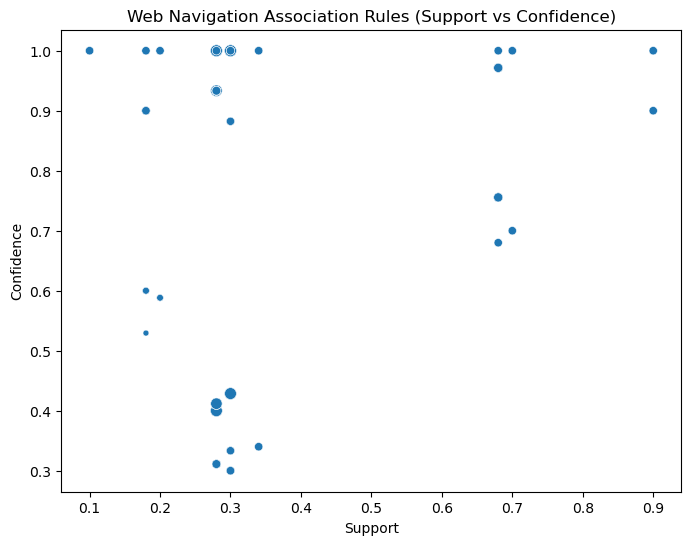

In [6]:
# Step 6: Visualization - Support vs Confidence
# =============================
if not frequent_items.empty and not rules.empty:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="support", y="confidence", size="lift", data=rules, legend=False)
    plt.title("Web Navigation Association Rules (Support vs Confidence)")
    plt.xlabel("Support")
    plt.ylabel("Confidence")
    plt.show()
else:
    print("⚠️ No rules to visualize.")

In [7]:
# Step 7: Display Top 5 Rules
# =============================
if not rules.empty:
    print("\n🧠 Top 5 Navigation Path Rules:")
    for i, row in rules.head(5).iterrows():
        print(f"{set(row['antecedents'])} → {set(row['consequents'])} "
              f"(support={row['support']:.2f}, confidence={row['confidence']:.2f}, lift={row['lift']:.2f})")
else:
    print("⚠️ No rules available to display.")


🧠 Top 5 Navigation Path Rules:
{'Home', 'Cart'} → {'Checkout'} (support=0.30, confidence=0.43, lift=1.43)
{'Cart'} → {'Home', 'Checkout'} (support=0.30, confidence=0.43, lift=1.43)
{'Cart'} → {'Checkout'} (support=0.30, confidence=0.43, lift=1.43)
{'Home', 'Cart'} → {'Checkout', 'Products'} (support=0.28, confidence=0.40, lift=1.43)
{'Home', 'Checkout'} → {'Cart'} (support=0.30, confidence=1.00, lift=1.43)
